In [10]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from pathlib import Path
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix    
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import tree
#import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz 
from sklearn.svm import LinearSVC   
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score


In [14]:
corpus_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\CORPUS')
project_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project')
data_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\Data')
endpoint="https://newsapi.org/v2/everything"
filename="newsApiData.csv"
nytimes_data =  "fav_sneaker_data.txt"
nike_vs_adidas_data =  "nike_vs_adidas_data.txt"
nike_reviews_data = "nike_reviews_data.csv"
twitter_data = "twitter_data.csv"
filtered_twitter_data = "filtered_twitter_data.csv"
nike_adidas_reviews_data = "nike_adidas_reviews_data.csv"
filtered_nike_adidas_reviews_data = "filtered_nike_adidas_reviews_data.csv"

In [33]:
filtered_df_path = data_path.joinpath(filtered_nike_adidas_reviews_data)
df_reviews = pd.read_csv('/content/sample_data/filtered_nike_adidas_reviews_data.csv', error_bad_lines=False)

In [34]:
def lemmatization(text):
    word_net_lemmatizer = WordNetLemmatizer()
    words = str(text).split()
    words = [word_net_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def stemming_words(text):
    porter_stemmer = PorterStemmer()
    words = str(text).split()
    words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

df_reviews['Review'] = df_reviews['Review'].apply(lemmatization)
df_reviews['Review'] = df_reviews['Review'].apply(stemming_words)

In [39]:
nike_reviews  = df_reviews[df_reviews['Brand'] == 'nike']
none_nike_reviews = df_reviews[df_reviews['Brand'] != 'nike']

def Svm(df_reviews):
        x = df_reviews['Review']
        y = df_reviews['Sentiment']
        x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
        SVM_Model = LinearSVC(C=1)
        
        vectorizer = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',stop_words='english')
        vectorizer.fit_transform(df_reviews['Review'])

        Train_X_Tfidf = vectorizer.transform(x_train)
        Test_X_Tfidf = vectorizer.transform(x_test)

                            
        SVM_Model.fit(Train_X_Tfidf, y_train)
        #print("SVM prediction using Linear Kernel:\n", SVM_Model.predict(Test_X_Tfidf))
        print("SVM score using the Linear Kernel:\n",SVM_Model.score(Test_X_Tfidf,y_test))
        #print("Actual:")
        #print(y_test)
        SVM_matrix = confusion_matrix(y_test, SVM_Model.predict(Test_X_Tfidf))
        print("\nThe confusion matrix is:")
        print(SVM_matrix)
        print("\n\n")
 
        SVM_Model2 = sklearn.svm.SVC(C=50, kernel='rbf', 
                           verbose=True, gamma="auto")                    
        SVM_Model2.fit(Train_X_Tfidf, y_train)
        #print("SVM prediction using Radial Basis function Kernel :\n", SVM_Model2.predict(Test_X_Tfidf))
        print("SVM score using the Radial Basis function Kernel:\n",SVM_Model2.score(Test_X_Tfidf,y_test))
        #print("Actual:")
        #print(y_test)
        print("RBF  :\n")
        SVM_matrix2 = confusion_matrix(y_test, SVM_Model2.predict(Test_X_Tfidf))
        print("\nThe confusion matrix is:")
        print(SVM_matrix2)
        print("\n\n")

        SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)
        SVM_Model3.fit(Train_X_Tfidf, y_train)
        #print("SVM prediction using Polynomial Kernel :\n",SVM_Model3.predict(Test_X_Tfidf))
        print("SVM score using Polynomial Kernel:\n",SVM_Model2.score(Test_X_Tfidf,y_test))
        #print("Actual:")
        #print(y_test)
        print("RBF  :\n")
        SVM_matrix3 = confusion_matrix(y_test, SVM_Model3.predict(Test_X_Tfidf))
        print("\nThe confusion matrix is:")
        print(SVM_matrix3)
        print("\n\n")

        top_features = 10
        COLNAMES = vectorizer.get_feature_names_out()
        coef = SVM_Model.coef_.ravel()
        top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
        top_positive_coefficients = top_positive_coefficients[top_positive_coefficients < 3000]

        top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
        top_negative_coefficients = top_negative_coefficients[top_negative_coefficients < 3000]

        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
        # create plot
        plt.figure(figsize=(15, 5))
        colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
        plt.bar(x=  np.arange(len(top_coefficients))  , height=coef[top_coefficients], width=.5,  color=colors)
        feature_names = np.array(COLNAMES)
        plt.xticks(np.arange(0, len(top_coefficients)), feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()

SVM score using the Linear Kernel:
 0.6923076923076923

The confusion matrix is:
[[34  0  4]
 [ 7  0  2]
 [11  0 20]]



[LibSVM]SVM score using the Radial Basis function Kernel:
 0.48717948717948717
RBF  :


The confusion matrix is:
[[38  0  0]
 [ 9  0  0]
 [31  0  0]]



[LibSVM]SVM score using Polynomial Kernel:
 0.48717948717948717
RBF  :


The confusion matrix is:
[[38  0  0]
 [ 9  0  0]
 [31  0  0]]





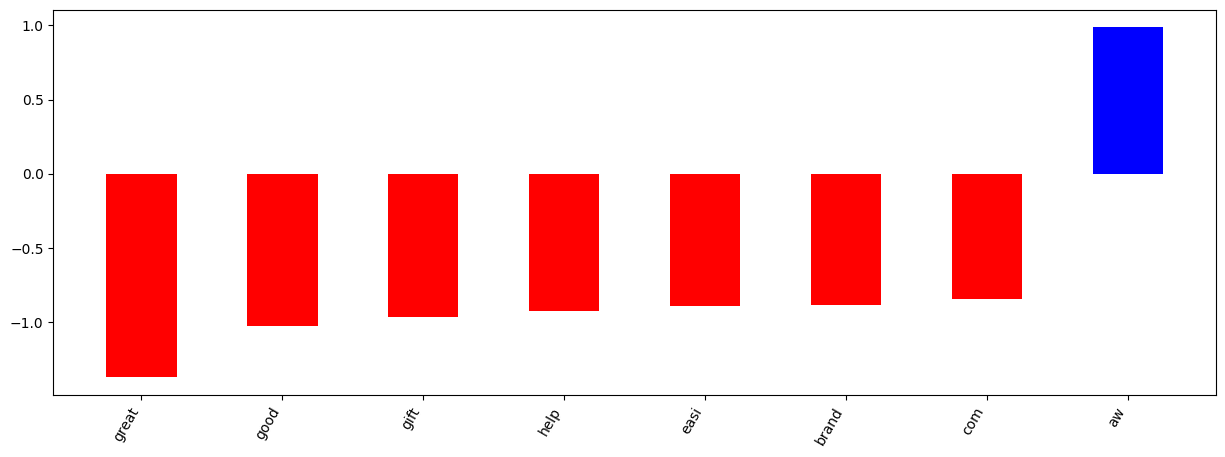

In [40]:
Svm(nike_reviews)

SVM score using the Linear Kernel:
 0.6410256410256411

The confusion matrix is:
[[43  0  5]
 [ 8  0  2]
 [13  0  7]]



[LibSVM]SVM score using the Radial Basis function Kernel:
 0.6153846153846154
RBF  :


The confusion matrix is:
[[48  0  0]
 [10  0  0]
 [20  0  0]]



[LibSVM]SVM score using Polynomial Kernel:
 0.6153846153846154
RBF  :


The confusion matrix is:
[[48  0  0]
 [10  0  0]
 [20  0  0]]





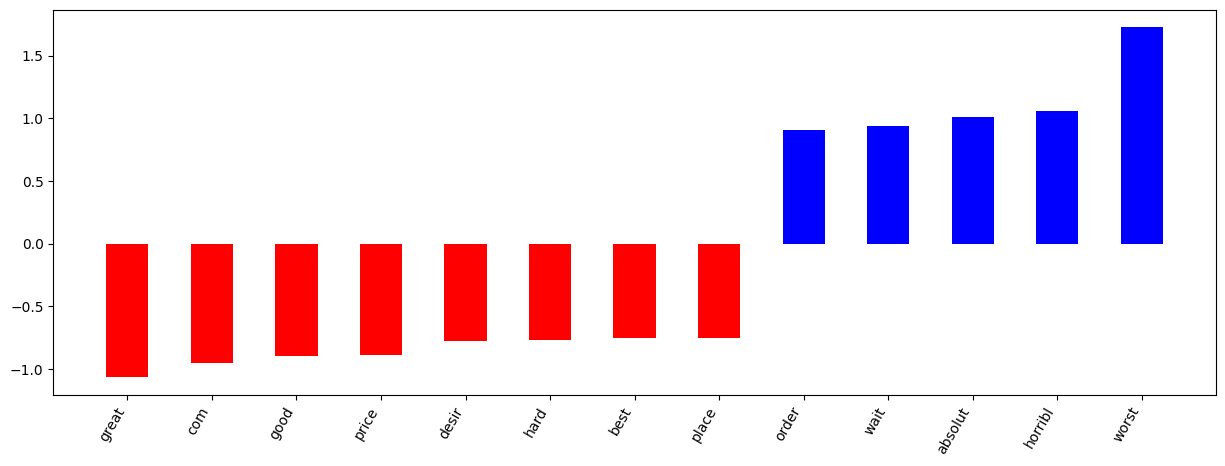

In [41]:
Svm(none_nike_reviews)